In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [15]:
# Check Measurement
check_Measurement = session.query(Measurement).first()
check_Measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f1e79fbc10>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1}

In [16]:
# Check Stations
check_Station = session.query(Station).first()
check_Station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f1e7a124c0>,
 'elevation': 3.0,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Precipitation Analysis

In [97]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latest_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
one_year = dt.date(latest_date.year -1, latest_date.month, latest_date.day)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = [Measurement.date, Measurement.prcp]
query_results = session.query(*precipitation_scores).filter(Measurement.date >= one_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column and Sort the dataframe by date
precipitation_df = pd.DataFrame(queryanswer, columns=['Date','Precipitation'])
precipitation_df = precipitation_df.dropna(how='any')
precipitation_df = precipitation_df.sort_values(["Date"], ascending=True)
precipitation_df = precipitation_df.set_index("Date")
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


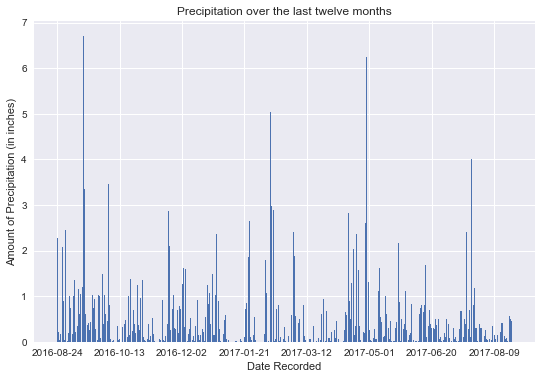

In [61]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(clean_precip.index, clean_precip["prcp"])
plt.xlabel("Date Recorded")
plt.ylabel("Amount of Precipitation (in inches)")
plt.title("Precipitation over the last twelve months")
plt.xticks(np.arange(0, 365, step=50))
plt.show()

# Exploratory Station Analysis

In [66]:
# Design a query to calculate the total number stations in the dataset
stations_number = session.query(Measurement.station).distinct(Measurement.station).count()
print(f"The total number of stations in the dataset is: {stations_number}")

The total number of stations in the dataset is: 9


In [83]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [88]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'

session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

In [89]:
print(f"The lowest temperature is 54F, the highest temperature was 85F, and the average temperature was 71.66F at Station USC00519281")

The lowest temperature is 54F, the highest temperature was 85F, and the average temperature was 71.66F at Station USC00519281


In [100]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
most_active_station = 'USC00519281'

temperature_results = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-23").\
                        filter(Measurement.date <= "2017-08-23").\
                        filter(Measurement.station == most_active_station).all()
temperature_data_df = pd.DataFrame(temperature_results)
temperature_data_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


<AxesSubplot:ylabel='Frequency'>

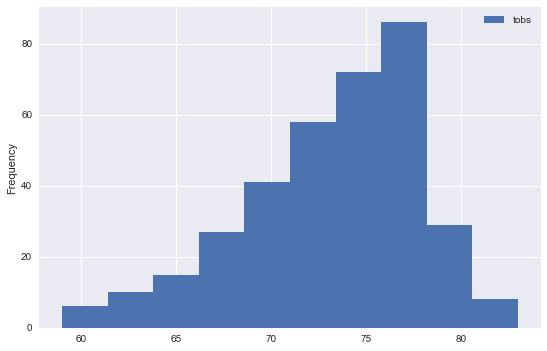

In [94]:
# Plot the results as a histogram
temperature_data_df.plot(kind="hist")

# Close session

In [95]:
# Close Session
session.close()